<a href="https://colab.research.google.com/github/Ellen-Tuane/INPE_CAP417_Computational_Statistics/blob/main/CAP417_Hands_on_6_Continuous_Random_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CAP-417-3: Computational Statistics

Hands On 05

Prof. Valdivino Alexandre de Santiago Júnior

Ellen Tuane

Subject: Continuous Random Variables and Probability Distributions [1]



# 0. Loading Data

In [2]:
! git clone https://github.com/vsantjr/CAP.git

Cloning into 'CAP'...
remote: Enumerating objects: 386, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 386 (delta 1), reused 2 (delta 0), pack-reused 379
Receiving objects: 100% (386/386), 46.44 MiB | 18.99 MiB/s, done.
Resolving deltas: 100% (189/189), done.


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import collections as matcoll
import seaborn as sns
import numpy as np
import math
from scipy.integrate import quad
from scipy.stats import norm

In [4]:
# read dataset
df = pd.read_csv('/content/CAP/CAP417/Precipitation/precipitation.csv')

In [ ]:
df.describe()

In [ ]:
df

In [7]:
df.Precipitation = df.Precipitation.astype(int)

# 1. Develop a program that can answer the following questions:

# 1.1 Show that this dataset is normally distributed.

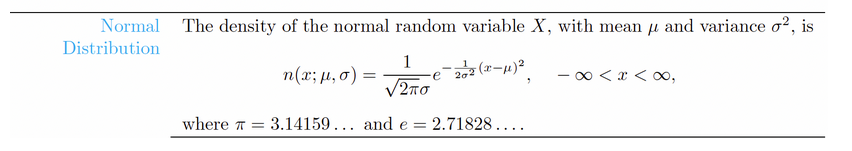

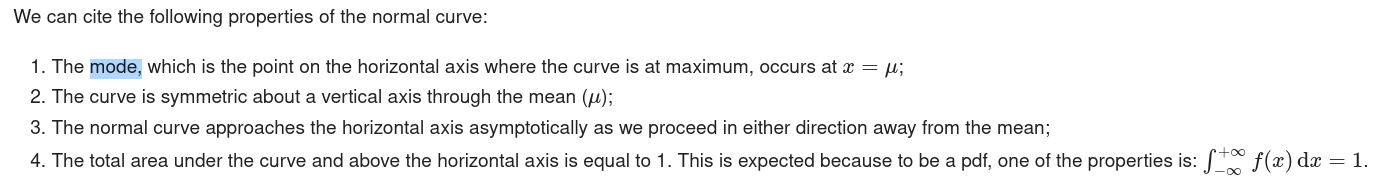

In [8]:
mean = np.mean(df.Precipitation)
median = np.median(df.Precipitation)
std = np.std(df.Precipitation)
mean, median, std

(34.83287671232877, 35.0, 9.988871270507643)

In [9]:
""" CDF of Normal Distribution to calculate the area under the curve""" # [3]

    
def cdf( mean, std, x_min, x_max, width=0.0001):
    cdf = 0
    the_range = int((x_max - x_min) / width) + 1 # calculate number of panels (+ 1 includes x_right)

    for i in range(the_range):
        x = x_min + i * width #current x value
        y = norm.pdf(x, mean, std) # Call PDF for each value of x_left to x_right 
        panel = y * width  # this panel area under PDF curve
        cdf += panel # sum panel areas = CDF

    return cdf

In [10]:
area = cdf(mean, std, np.min(df.Precipitation), np.max(df.Precipitation))
area

0.9965858717372198

In [11]:
print(f"Property 1: Mean {round(mean,2)} ≅ Median {median}")
print(f"Property 2: It can be proved in figure 3 above in topic 1.2")
print(f"Property 3: It can be proved in figure 3 above in topic 1.2")
print(f"Property 4: Total area under the curve is {round(area, 3)} which is ≅ 1")

Property 1: Mean 34.83 ≅ Median 35.0
Property 2: It can be proved in figure 3 above in topic 1.2
Property 3: It can be proved in figure 3 above in topic 1.2
Property 4: Total area under the curve is 0.997 which is ≅ 1


# 1.2 Plot the raw data and also the pdf of this dataset.

Normalizing data set

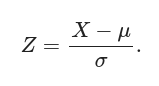

In [12]:
df_normalized = []
for i in df.Precipitation:
    df_normalized.append((i - mean )/ std)

In [13]:
df_normalized_mean = np.mean(df_normalized)
df_normalized_median = np.median(df_normalized)
df_normalized_std = np.std(df_normalized)
round(df_normalized_mean, 2), round(df_normalized_median, 2), round(df_normalized_std,2)

(-0.0, 0.02, 1.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


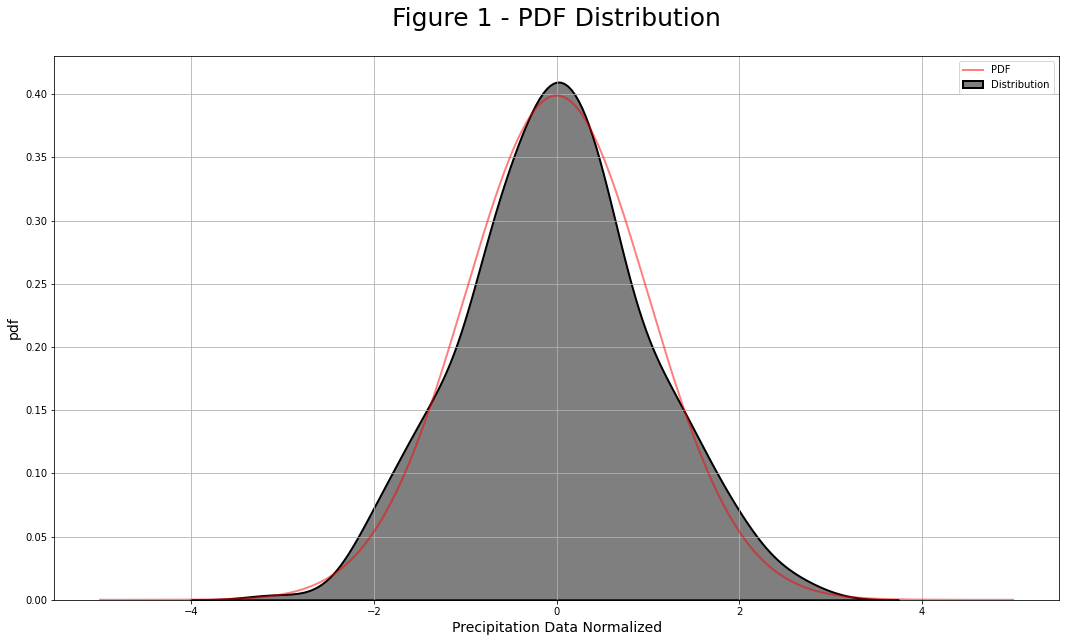

In [32]:
#plot data distribuition
fig, axs = plt.subplots(figsize=(18, 10))

# set data
axs = sns.lineplot(x, pdf, color='red', alpha=0.5, linewidth=2)
axs = sns.kdeplot(df_normalized , multiple="stack", common_grid=True, color='black', alpha=0.5, linewidth=2)

#Create labels 
axs.set_xlabel('Precipitation Data Normalized', size=14)
axs.set_ylabel('pdf', size=14)
axs.spines['bottom'].set_position('zero')

# set title
plt.title('Figure 1 - PDF Distribution', pad=30, size=25)
plt.grid()
plt.legend(["PDF", "Distribution"])
plt.show()

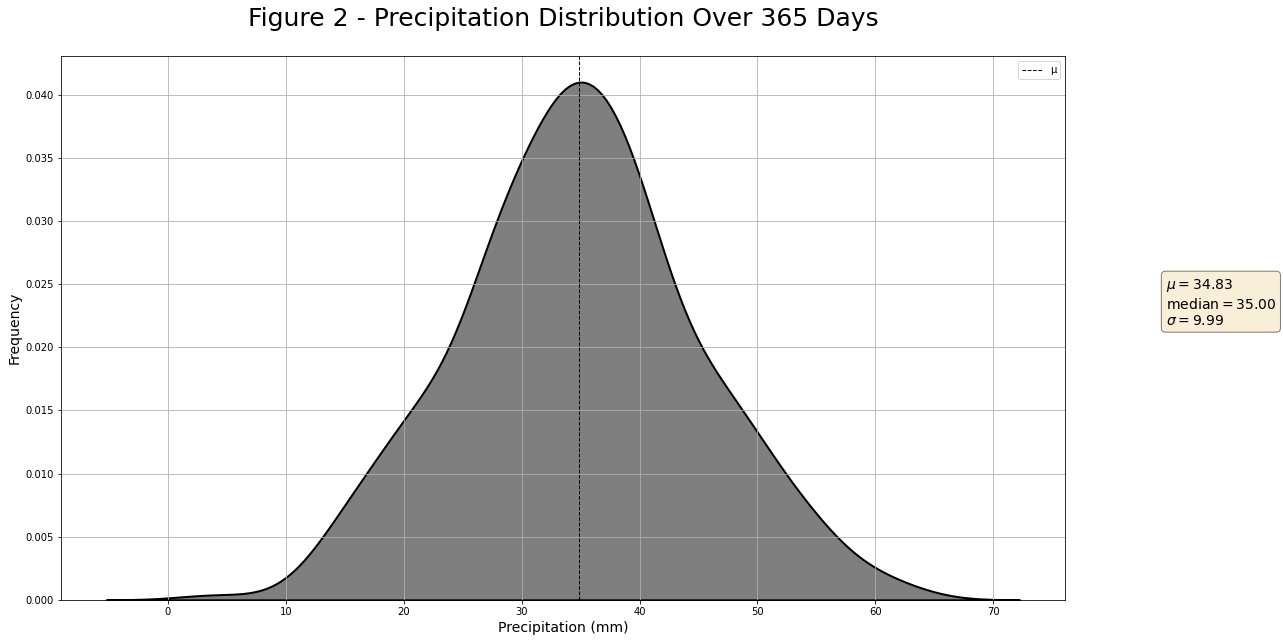

In [16]:
#plot data distribuition
fig, axs = plt.subplots(figsize=(18, 10))

# set data
axs = sns.kdeplot(data=df.Precipitation, multiple="stack", common_grid=True, color='black', alpha=0.5, linewidth=2)

# set text box and mean line
textstr = '\n'.join((r'$\mu=%.2f$' % (mean, ), r'$\mathrm{median}=%.2f$' % (median, ), r'$\sigma=%.2f$' % (std, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axs.text(1.1, 0.5, textstr, transform=axs.transAxes, fontsize=14, verticalalignment='bottom', bbox=props)  
axs.axvline(mean, color='k', linestyle='dashed', linewidth=1)

#Create labels 
axs.set_xlabel('Precipitation (mm)', size=14)
axs.set_ylabel('Frequency', size=14)

# set title
plt.title('Figure 2 - Precipitation Distribution Over 365 Days', pad=30, size=25)
plt.legend(["μ"])
plt.grid()
plt.show()

# 1.3 Does the above pdf actually satisfy property 3 (see at the beginning) that a function must have in order to be really considered a pdf?

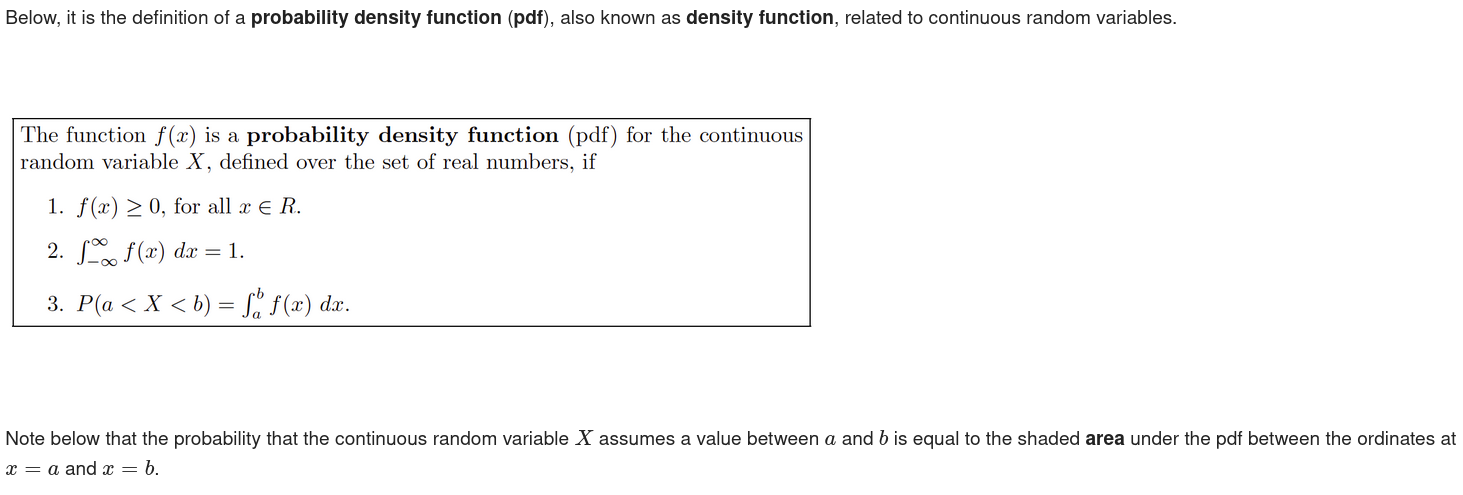

In [14]:
x = np.linspace(df_normalized_mean - (5), df_normalized_mean + (5), 1000)
pdf = norm.pdf(x, df_normalized_mean, df_normalized_std)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


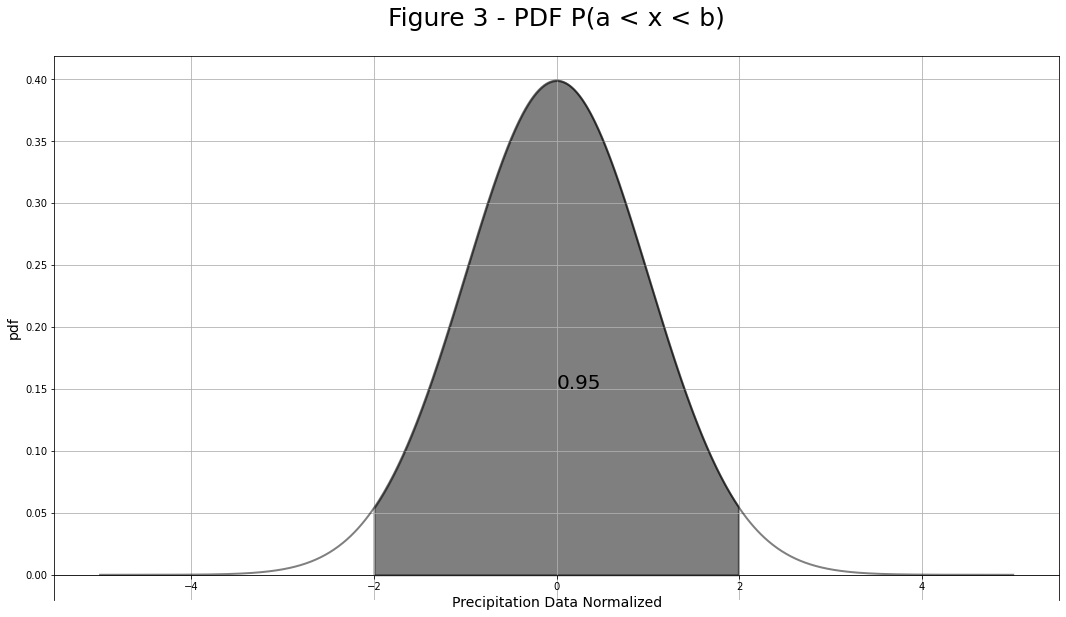

In [59]:
# Considering a = -2 and b = 2
a = -2
b = 2

# calculating P(a < x < b)
px = np.arange(a, b, 0.01)
y = norm.pdf(px, df_normalized_mean, df_normalized_std)


#plot the area
fig, axs = plt.subplots(figsize=(18, 10))

# set data
axs = sns.lineplot(x, pdf, color='black', alpha=0.5, linewidth=2)

# for fill_between
#px = np.arange(a, b, 0.01)
axs.fill_between(px, y, alpha=0.5, color='k', linewidth=2)
prob = round(norm(df_normalized_mean,df_normalized_std).cdf(b) - norm(df_normalized_mean,df_normalized_std).cdf(a), 2)
axs.text(0, 0.15, prob, fontsize=20)

#Create labels 
axs.set_xlabel('Precipitation Data Normalized', size=14)
axs.set_ylabel('pdf', size=14)
axs.spines['bottom'].set_position('zero')

# set title
plt.title('Figure 3 - PDF P(a < x < b)', pad=30, size=25)
plt.grid()
plt.show()

Answer: Yes, the above pdf satisfy the property 3, since the probability that the continuous random variable X assumes a value between a and b is equal to the shaded area under the pdf between the ordinates at x = -2 and x = 2.

# 1.4 What is the expected profit of this farm?

On a given farm, profits depend on rain. Consider the dataset shown here that provides the precipitation (in mm) in one year in the location of the farm. Moreover, consider that the expected profit of the farm is in accordance with the following conditions:


* If the precipitation is over 47 mm, the profit is R$ 50,000.00;

* If the precipitation is between 30 and 47 mm, the profit is R$ 100,000.00;

* If the precipitation is between 20 and 30 mm, the profit is R$ 80,000.00;

* If the precipitation is between 10 and 20 mm, the profit is R$ 35,000.00;

* If the precipitation is between 5 and 10 mm, the profit is R$ -30,000.00;

*  If the precipitation is less than 5 mm, the profit is R$ -50,000.00.


In [18]:
df_pdf = norm.pdf(df.Precipitation, mean, std)
len(df_pdf), len(df.Precipitation)

(365, 365)

In [35]:
# P (x1 < X < x2)
def profit_probability(x2, x1, mean, std):
    return norm(mean,std).cdf(x2) - norm(mean,std).cdf(x1)

In [36]:
# If the precipitation is over 47 mm, the profit is R$ 50,000.00;
p1 = round(profit_probability(np.max(df.Precipitation), 47, mean, std), 4)

# If the precipitation is between 30 and 47 mm, the profit is R$ 100,000.00;
p2 = round(profit_probability(46, 30, mean, std), 4)

# If the precipitation is between 20 and 30 mm, the profit is R$ 80,000.00;
p3 = round(profit_probability(29, 20, mean, std), 4)

# If the precipitation is between 10 and 20 mm, the profit is R$ 35,000.00;
p4 = round(profit_probability(19, 10, mean, std), 4)

# If the precipitation is between 5 and 10 mm, the profit is R$ -30,000.00;
p5 = round(profit_probability(9, 5, mean, std), 4)

# If the precipitation is less than 5 mm, the profit is R$ -50,000.00.
p6 = round(profit_probability(4, np.min(df.Precipitation), mean, std), 4)

p1, p2, p3, p4, p5,p6

(0.1092, 0.554, 0.2109, 0.05, 0.0034, 0.0)

In [48]:
intervals = [[np.max(df.Precipitation), 47, 50000], [47,30, 100000], [30, 20, 80000], [20,10, 35000], [10, 5, -30000], [5, np.min(df.Precipitation), -50000]]
profit = []

for i in intervals:
    x2 = i[0]
    x1 = i[1]
    i.append(profit_probability(x2, x1, mean, std))
    profit.append(i[2] * i[3])

print(f"the probability if the precipitation is over 47 mm is iqual to {round(intervals[0][3],4)} and the profit is R$ {round(profit[0], 2)}")
print(f"the probability if the precipitation is between 30 and 47 mm is iqual to {round(intervals[1][3],4)} and the profit is R$ {round(profit[1], 2)}")
print(f"the probability if the precipitation is between 20 and 30 mm is iqual to {round(intervals[2][3],4)} and the profit is R$ {round(profit[2], 2)}")
print(f"the probability if the precipitation is between 10 and 20 mm is iqual to {round(intervals[3][3], 4)} and the profit is R$ {round(profit[3], 2)}")
print(f"the probability if the precipitation is between 5 and 10 mm is iqual to {round(intervals[4][3], 4)} and the profit is R$ {round(profit[4], 2)}")
print(f"the probability if the precipitation is less than 5 mm is iqual to {round(intervals[5][3], 4)} and the profit is R$ {round(profit[5], 2)}")



print(f"The total expected profit is R$", round(sum(profit),2))


the probability if the precipitation is over 47 mm is iqual to 0.1092 and the profit is R$ 5459.84
the probability if the precipitation is between 30 and 47 mm is iqual to 0.5741 and the profit is R$ 57414.63
the probability if the precipitation is between 20 and 30 mm is iqual to 0.2455 and the profit is R$ 19637.98
the probability if the precipitation is between 10 and 20 mm is iqual to 0.0623 and the profit is R$ 2181.25
the probability if the precipitation is between 5 and 10 mm is iqual to 0.005 and the profit is R$ -151.44
the probability if the precipitation is less than 5 mm is iqual to 0.0004 and the profit is R$ -19.93
The total expected profit is R$ 84522.33


# Conclusion

It was possible to undertand the PDF properties and the importance of it in statistics applied problems. The property 4 was highlighted in this activity, this property shows that the area under the PDF distribution line is igual to the probability for a given X, and that vizualization is clear enough to also undertand the CDF of a normal distribution when comes to continuos random variables.

# References:

[1] Continuous Random Variables and Probability Distributions. Available at: https://github.com/vsantjr/CAP/blob/master/CAP417/Material/CAP-417_Estatistica%20Computacional_Prof%20Valdivino_A03.ipynb. Accessed on: Abr 22, 22.

[2] V. A. Santiago Júnior. CAP-417: Estatística Computacional (Computational Statistics), 2022. Acessed on: Abr 22, 22. Available at: https://github.com/vsantjr/CAP/tree/master/CAP417.

[3] Normal Distribution: An Introductory Guide to PDF and CDF. Integrated Machine Learning, 2020. Available at: https://integratedmlai.com/normal-distribution-an-introductory-guide-to-pdf-and-cdf/. Accessed on: Abr 22, 22.

